<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.8_correlation/stats_corr_Kendall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Correlation
# Kendall correlation

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [5]:

# Example data
x = np.random.rand(100)
y = np.random.rand(100)

# Compute Kendall's Tau correlation
tau, p_value = stats.kendalltau(x, y)

print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")

Kendall's Tau: 0.038
P-value: 0.576


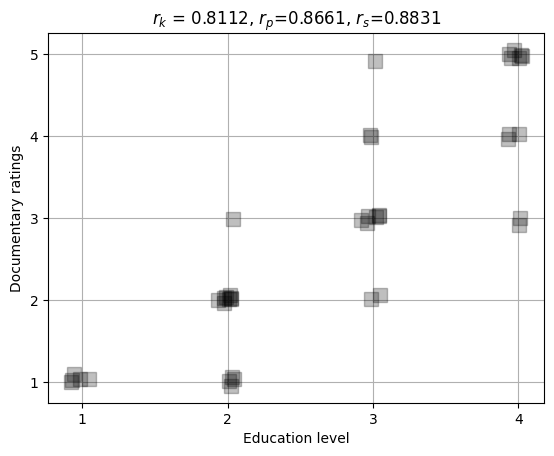

In [2]:
## generate some data!

N = 40

# movie ratings
docuRatings = np.random.randint(low=1,high=6,size=N)

# education level (1-4, correlated with docuRatings)
eduLevel = np.ceil( (docuRatings + np.random.randint(low=1,high=5,size=N) )/9 * 4 )

# compute the correlations
cr = [0,0,0]
cr[0] = stats.kendalltau(eduLevel,docuRatings)[0]
cr[1] = stats.pearsonr(eduLevel,docuRatings)[0]
cr[2] = stats.spearmanr(eduLevel,docuRatings)[0]

# round for convenience
cr = np.round(cr,4)


# plot the data
plt.plot(eduLevel+np.random.randn(N)/30,docuRatings+np.random.randn(N)/30,'ks',markersize=10,markerfacecolor=[0,0,0,.25])
plt.xticks(np.arange(4)+1)
plt.yticks(np.arange(5)+1)
plt.xlabel('Education level')
plt.ylabel('Documentary ratings')
plt.grid()
plt.title('$r_k$ = %g, $r_p$=%g, $r_s$=%g'%(cr[0],cr[1],cr[2]))

plt.show()

In [3]:
## correlation estimation errors under H0

numExprs = 1000
nValues = 50
nCategories = 6

c = np.zeros((numExprs,3))

for i in range(numExprs):

    # create data
    x = np.random.randint(low=0,high=nCategories,size=nValues)
    y = np.random.randint(low=0,high=nCategories,size=nValues)

    # store correlations
    c[i,:] = [ stats.kendalltau(x,y)[0],
               stats.pearsonr(x,y)[0],
               stats.spearmanr(x,y)[0] ]
print(c)

[[ 0.07894754  0.10694304  0.10161279]
 [ 0.00889769  0.03792276  0.0131523 ]
 [ 0.03114299  0.0629418   0.04999534]
 ...
 [ 0.11972666  0.13858629  0.14518215]
 [-0.02829354 -0.02303267 -0.03355413]
 [-0.06241322 -0.08079432 -0.08339511]]


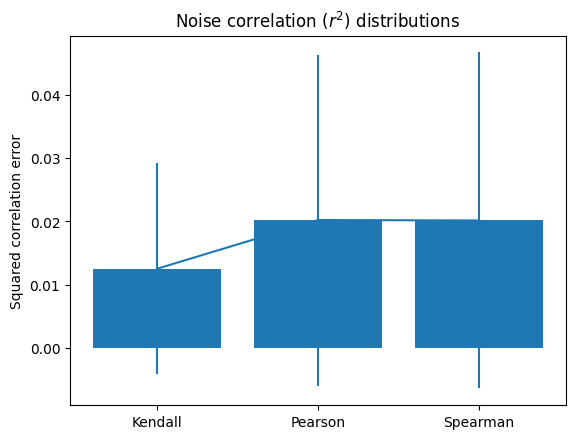

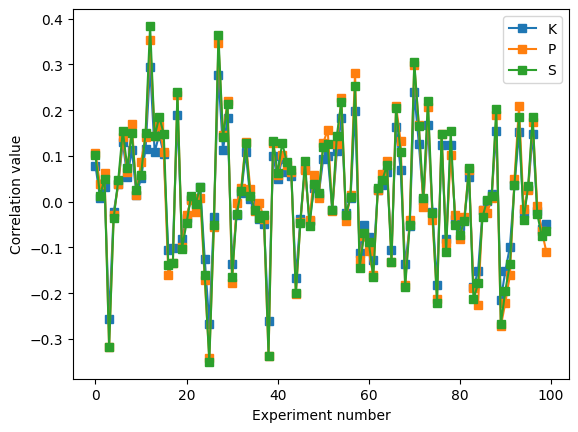

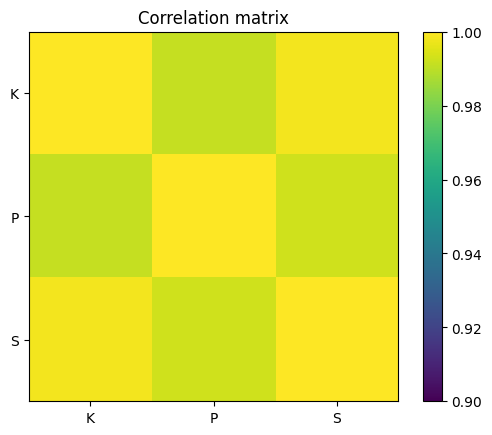

In [4]:
## show the graphs
plt.bar(range(3),np.mean(c**2,axis=0))
plt.errorbar(range(3),np.mean(c**2,axis=0),yerr=np.std(c**2,ddof=1,axis=0))
plt.xticks(range(3),('Kendall','Pearson','Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()


plt.plot(c[:100,:],'s-')
plt.xlabel('Experiment number')
plt.ylabel('Correlation value')
plt.legend(('K','P','S'))
plt.show()


plt.imshow(np.corrcoef(c.T),vmin=.9,vmax=1)
plt.xticks(range(3),['K','P','S'])
plt.yticks(range(3),('K','P','S'))
plt.colorbar()
plt.title('Correlation matrix')
plt.show()

---
Daes Kendall vs. Pearson matter?
---

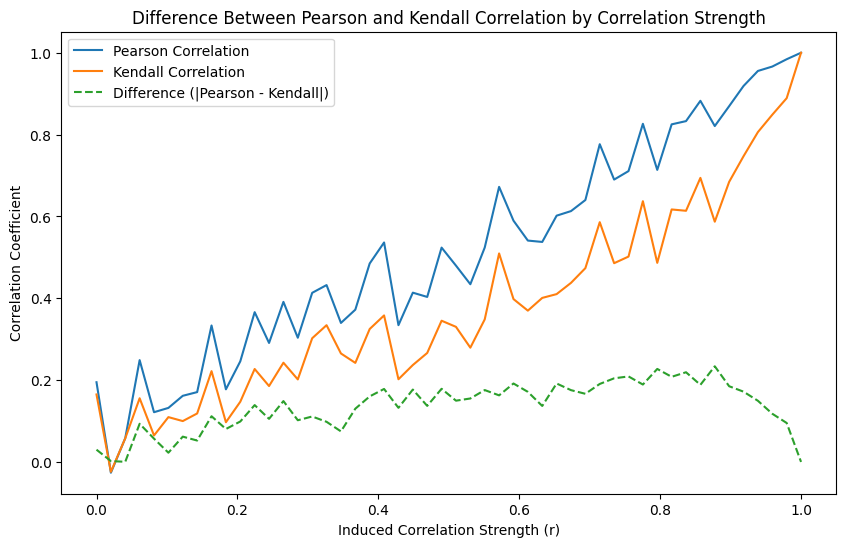

In [10]:

# Parameters
N = 100  # Number of data points in each dataset
num_points = 50  # Number of correlation levels to test
corr_strengths = np.linspace(0, 1, num_points)  # Varying levels of correlation

# Initialize arrays to store correlations
pearson_corr = []
kendall_corr = []
correlation_diffs = []

# Loop over different correlation strengths
for r in corr_strengths:
    # Generate two correlated variables x and y
    x = np.random.randn(N)
    y = r * x + np.sqrt(1 - r**2) * np.random.randn(N)  # Inducing the desired correlation

    # Calculate Pearson and Kendall correlations
    pearson = stats.pearsonr(x, y)[0]
    kendall = stats.kendalltau(x, y)[0]

    # Append results
    pearson_corr.append(pearson)
    kendall_corr.append(kendall)
    correlation_diffs.append(abs(pearson - kendall))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(corr_strengths, pearson_corr, label='Pearson Correlation')
plt.plot(corr_strengths, kendall_corr, label='Kendall Correlation')
plt.plot(corr_strengths, correlation_diffs, label='Difference (|Pearson - Kendall|)', linestyle='--')
plt.xlabel('Induced Correlation Strength (r)')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.title('Difference Between Pearson and Kendall Correlation by Correlation Strength')
plt.show()

---
var_2
---

In [6]:
N = 100000 # data points per sample
num_rs = 100
r_vals = np.linspace(-1,1,num_rs) # will calc kendall and pearson r for each

pearson_rs = np.zeros(num_rs)
kendall_rs = np.zeros(num_rs)

for i in range(num_rs):
    x = np.random.rand(N)
    y = np.random.rand(N)
    r = r_vals[i]
    y = x*r + y*np.sqrt(1-r**2)
    pear_r, pear_p = stats.pearsonr(x,y)
    ken_r, ken_p = stats.kendalltau(x,y)
    pearson_rs[i] = pear_r
    kendall_rs[i] = ken_r

diff = pearson_rs - kendall_rs
sq_err = diff**2
max_sq_err = sq_err.max()
max_id = np.where(sq_err==max_sq_err)

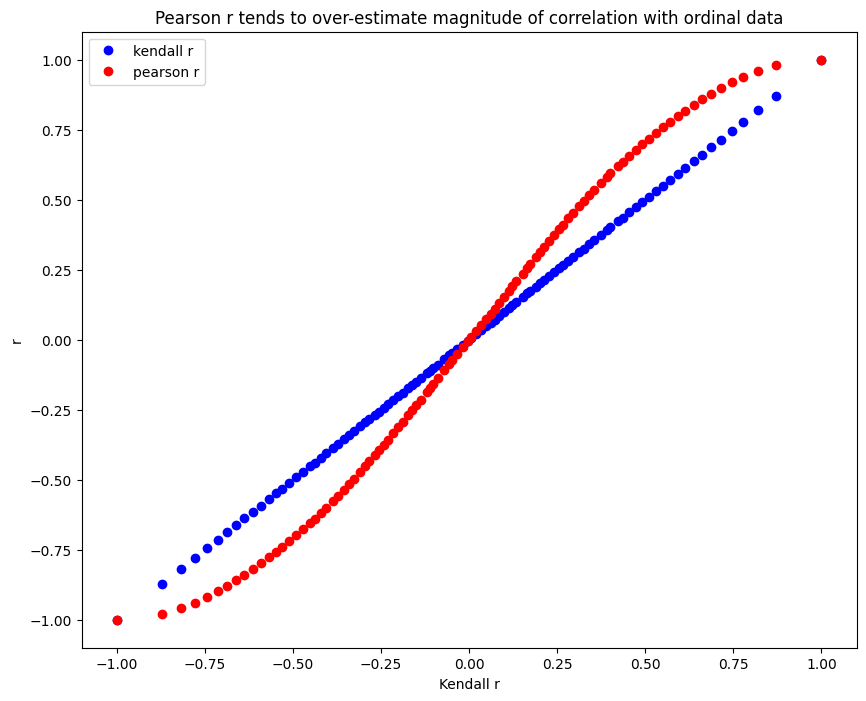

In [8]:
plt.figure(figsize=(10,8))
plt.plot(kendall_rs, kendall_rs, 'bo')
plt.plot(kendall_rs, pearson_rs, 'ro')
plt.legend(['kendall r', 'pearson r'])
plt.title("Pearson r tends to over-estimate magnitude of correlation with ordinal data")
plt.xlabel("Kendall r")
plt.ylabel("r")
plt.show()

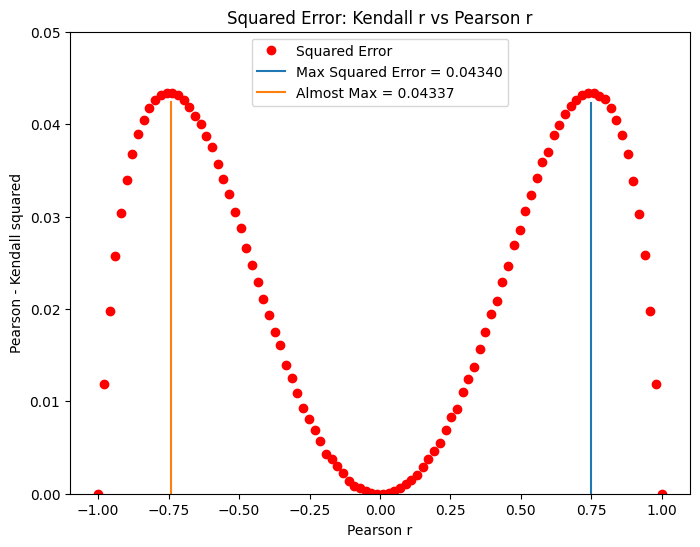

In [9]:
plt.figure(figsize=(8,6))
plt.plot(r_vals, sq_err, 'ro')
plt.plot([.75, .75], [sq_err[87] - .001, 0])
plt.plot([-.74, -.74], [sq_err[13] - .001, 0])
plt.ylim([0, .05])
plt.legend(["Squared Error", "Max Squared Error = 0.04340", "Almost Max = 0.04337"])
plt.xlabel("Pearson r")
plt.ylabel("Pearson - Kendall squared")
plt.title("Squared Error: Kendall r vs Pearson r")
plt.show()